In [30]:
pip install mdtraj numpy matplotlib


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


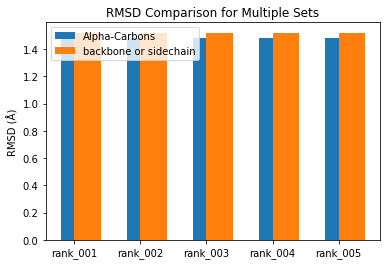

In [44]:
#Q1
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Define the file paths for your protein structure sets
file_paths = ["/home/hz2750/comp-lab-class/comp-lab-class-2023/Week7/Input/2w9t_Alphafold187_e32a2/2w9t_Alphafold187_e32a2_unrelaxed_rank_001_alphafold2_ptm_model_5_seed_000.pdb",
              "/home/hz2750/comp-lab-class/comp-lab-class-2023/Week7/Input/2w9t_Alphafold187_e32a2/2w9t_Alphafold187_e32a2_unrelaxed_rank_002_alphafold2_ptm_model_4_seed_000.pdb", 
              "/home/hz2750/comp-lab-class/comp-lab-class-2023/Week7/Input/2w9t_Alphafold187_e32a2/2w9t_Alphafold187_e32a2_unrelaxed_rank_003_alphafold2_ptm_model_3_seed_000.pdb", 
              "/home/hz2750/comp-lab-class/comp-lab-class-2023/Week7/Input/2w9t_Alphafold187_e32a2/2w9t_Alphafold187_e32a2_unrelaxed_rank_004_alphafold2_ptm_model_1_seed_000.pdb",
              "/home/hz2750/comp-lab-class/comp-lab-class-2023/Week7/Input/2w9t_Alphafold187_e32a2/2w9t_Alphafold187_e32a2_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000.pdb"]
labels = ['rank_001', 'rank_002', 'rank_003', 'rank_004', 'rank_005']

# Create empty arrays to store the RMSD values
rmsd_alpha_values = []
rmsd_all_atoms_values = []

for file_path in file_paths:
    # Load the AlphaFold predictions and crystal structure for each set
    alpha_traj = md.load(file_path)
    crystal_traj = md.load("/home/hz2750/comp-lab-class/comp-lab-class-2023/Week7/Input/2w9t.pdb")

    # Select a common set of atoms for alignment (e.g., alpha carbons)
    alphacarbon = "name CA"

    # Align the two structures based on the common atoms
    alpha_traj_aligned = alpha_traj.superpose(crystal_traj, atom_indices=alpha_traj.top.select(alphacarbon))

    # Calculate RMSD for alpha carbons
    rmsd_alpha = md.rmsd(alpha_traj_aligned, crystal_traj, atom_indices=alpha_traj.top.select(alphacarbon))

    # Select all atoms for the second RMSD calculation
    all_atoms = "backbone or sidechain"

    # Align the two structures based on all atoms
    alpha_traj_aligned = alpha_traj.superpose(crystal_traj, atom_indices=alpha_traj.top.select(all_atoms))

    # Calculate RMSD for all atoms
    rmsd_all_atoms = md.rmsd(alpha_traj_aligned, crystal_traj, atom_indices=alpha_traj.top.select(all_atoms))

    # Flatten the RMSD arrays to 1D arrays and store them
    rmsd_alpha = rmsd_alpha.flatten()
    rmsd_all_atoms = rmsd_all_atoms.flatten()

    rmsd_alpha_values.append(rmsd_alpha[0])  # Use [0] to access the first (and only) value in the array
    rmsd_all_atoms_values.append(rmsd_all_atoms[0])  # Use [0] to access the first (and only) value in the array

# Create a bar plot to compare the RMSD values for all sets
x = np.arange(len(labels))

plt.bar(x, rmsd_alpha_values, width=0.4, label='Alpha-Carbons')
plt.bar(x, rmsd_all_atoms_values, width=0.4, label='backbone or sidechain', align='edge')


plt.ylabel('RMSD (Å)')
plt.title('RMSD Comparison for Multiple Sets')
plt.xticks(x, labels)
plt.legend(loc='upper left')
plt.show()

In [43]:
plt.savefig('/home/hz2750/comp-lab-class/comp-lab-class-2023/Week7/Figures/RMSDComparison.png')
#has same error as last week, the png file is saved in Figures folder, but cannot be read.

<Figure size 432x288 with 0 Axes>

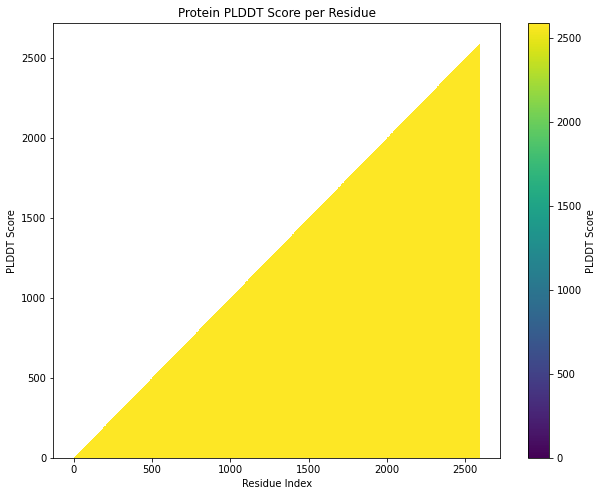

<Figure size 432x288 with 0 Axes>

In [48]:
#Q2
# Load the PDB file with PLDDT scores
protein_traj = md.load("/home/hz2750/comp-lab-class/comp-lab-class-2023/Week7/Input/2w9t/relaxed_model_1_pred_0.pdb")

# Extract PLDDT scores from the B-factor column
plddt_scores = protein_traj.top.select("all").astype(float)  # Assuming PLDDT values are in the B-factor column

# Extract residue indices (0-based) for the x-coordinate
residue_indices = range(len(plddt_scores))

# Define a color map based on PLDDT scores
cmap = plt.get_cmap("viridis")  # You can choose a different colormap if you prefer

# Create a figure and bar plot
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.bar(
    residue_indices,
    plddt_scores,
    color=cmap(plddt_scores),  # Use PLDDT scores for color
    width=1.0,  # Bar width (adjust as needed)
)

# Set labels and title
ax.set_xlabel("Residue Index")
ax.set_ylabel("PLDDT Score")
ax.set_title("Protein PLDDT Score per Residue")

# Add a color bar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(plddt_scores), vmax=max(plddt_scores)))
sm.set_array([])  # Create an empty array
cbar = plt.colorbar(sm)
cbar.set_label("PLDDT Score")


# Display the plot in your Jupyter Notebook (optional)
plt.show()

plt.savefig("/home/hz2750/comp-lab-class/comp-lab-class-2023/Week7/Figures/protein_PLDDT_per_residue.png", dpi=300, bbox_inches="tight")
